In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from statistics import mean
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [2]:
dataset = pd.read_csv('./Clean_Dataset.csv')
dataset.drop(columns=['Unnamed: 0'], inplace=True) 

# feature selection and dropping price column
unincluded_features = [ 'price']

X = dataset.drop(unincluded_features, axis = 1)
y = dataset['price']

## KNN

In [3]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = numerical_features = [col for col in X.columns if col not in categorical_features and col != 'price']

for col in categorical_features:
    X[col] = X[col].astype('category')

le = LabelEncoder()
for col in categorical_features:
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

standScaler = StandardScaler()
minMaxScaler = MinMaxScaler(feature_range=(0,1))

X_train_mmscaler = minMaxScaler.fit_transform(X_train)
X_test_mmscaler = minMaxScaler.fit_transform(X_test)

X_train_stscaler = standScaler.fit_transform(X_train)
X_test_stscaler = standScaler.transform(X_test)

def KNN(X_train, X_test, y_train, y_test, verbose=False):
    results = []
    for k in range(1, 31, 2):
        if verbose:
            print(f"Started for k={k}")
        modelKNN = KNeighborsRegressor(n_neighbors=k)
        modelKNN.fit(X_train, y_train)
        
        y_pred = modelKNN.predict(X_test)
     
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
    
        results.append({'k': k, 'MAE': mae, 'MSE': mse, 'MAPE': rmse, 'R2': r2})
        
    if verbose:
        print(f"Done for k={k}", {'k': k, 'MAE': mae, 'MSE': mse, 'MAPE': rmse, 'R2': r2})
    results_df = pd.DataFrame(results).set_index('k')
    return results_df

results_df_stscaler = KNN(X_train_stscaler, X_test_stscaler, y_train, y_test)
results_df_mm = KNN(X_train_mmscaler, X_test_mmscaler, y_train, y_test)

def plot_KNN(results_df):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
    axes = axes.flatten()  
    
    # Plot MAE
    axes[0].plot(results_df.index, results_df['MAE'], marker='o', color='b')
    axes[0].set_title('Mean Absolute Error (MAE)')
    axes[0].set_xlabel('k')
    axes[0].set_ylabel('MAE')
    
    # Plot MSE
    axes[1].plot(results_df.index, results_df['MSE'], marker='o', color='r')
    axes[1].set_title('Mean Squared Error (MSE)')
    axes[1].set_xlabel('k')
    axes[1].set_ylabel('MSE')
    
    # Plot RMSE
    axes[2].plot(results_df.index, results_df['MAPE'], marker='o', color='g')
    axes[2].set_title('Root Mean Squared Error (MAPE)')
    axes[2].set_xlabel('k')
    axes[2].set_ylabel('MAPE')
    
    # Plot R2
    axes[3].plot(results_df.index, results_df['R2'], marker='o', color='purple')
    axes[3].set_title('R-squared (R2)')
    axes[3].set_xlabel('k')
    axes[3].set_ylabel('R2')
    
    plt.tight_layout()
    plt.show()

In [4]:
results_df_mm

,MAE,MSE,MAPE,R2
k,,,,
1,1820.585534,2.163767e+07,0.099804,0.958003
3,1777.850351,1.503783e+07,0.103211,0.970813
5,1857.166648,1.469743e+07,0.111107,0.971473
7,1919.876692,1.486647e+07,0.117160,0.971145
9,1962.214266,1.498145e+07,0.122069,0.970922
11,2012.332122,1.525408e+07,0.127188,0.970393
13,2065.186399,1.556804e+07,0.132490,0.969784
15,2112.316830,1.585842e+07,0.137324,0.969220
17,2153.955217,1.614437e+07,0.141480,0.968665


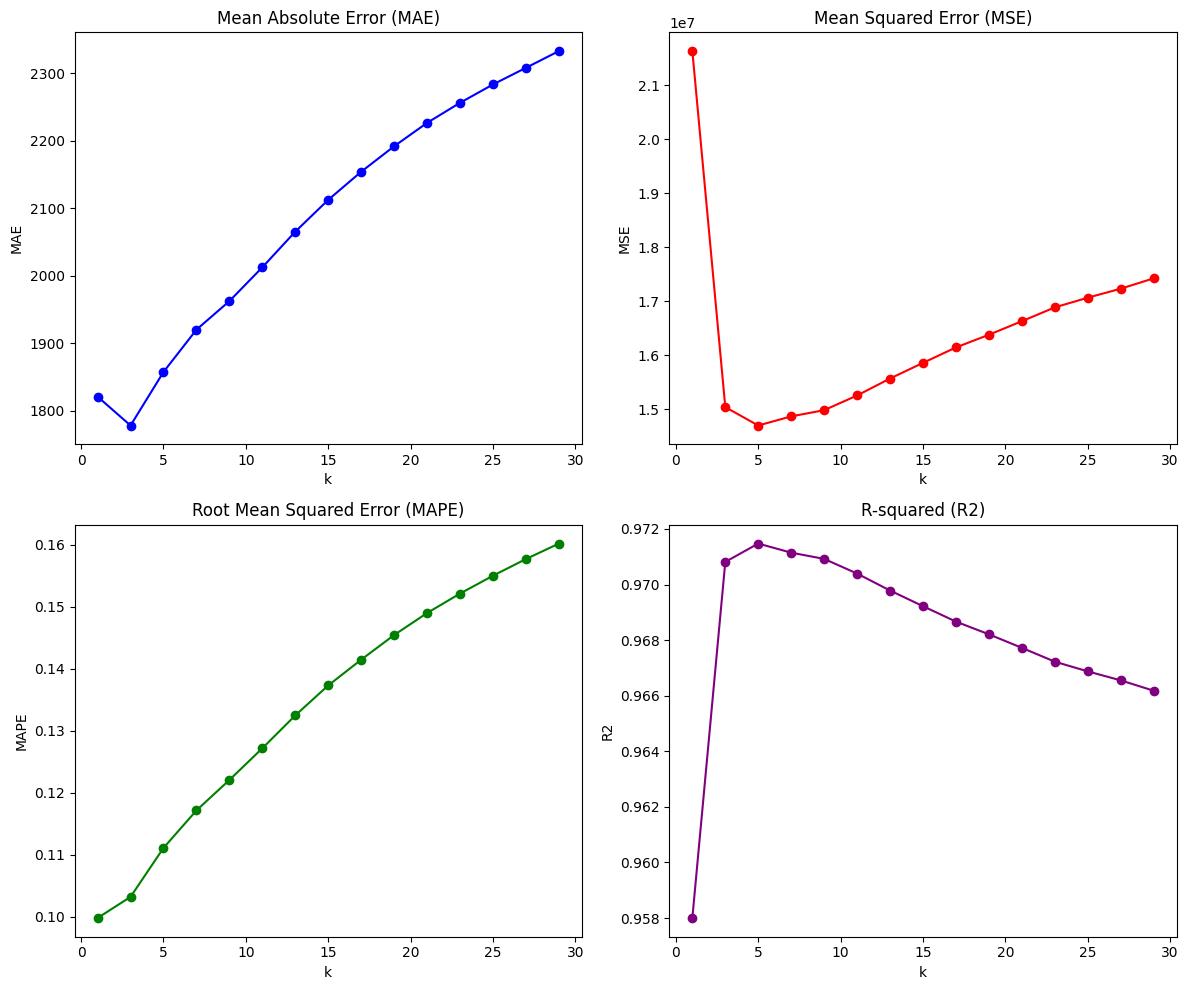

In [5]:
plot_KNN(results_df_mm)

In [6]:
results_df_stscaler

,MAE,MSE,MAPE,R2
k,,,,
1,1556.366635,1.791069e+07,0.091530,0.965237
3,1617.393210,1.285248e+07,0.097917,0.975054
5,1753.345754,1.322952e+07,0.107816,0.974322
7,1848.541139,1.374497e+07,0.115499,0.973322
9,1921.622666,1.415715e+07,0.121678,0.972522
11,1989.179957,1.461519e+07,0.127535,0.971633
13,2050.387506,1.502607e+07,0.132936,0.970836
15,2102.646437,1.544502e+07,0.137897,0.970022
17,2147.456079,1.578050e+07,0.142538,0.969371


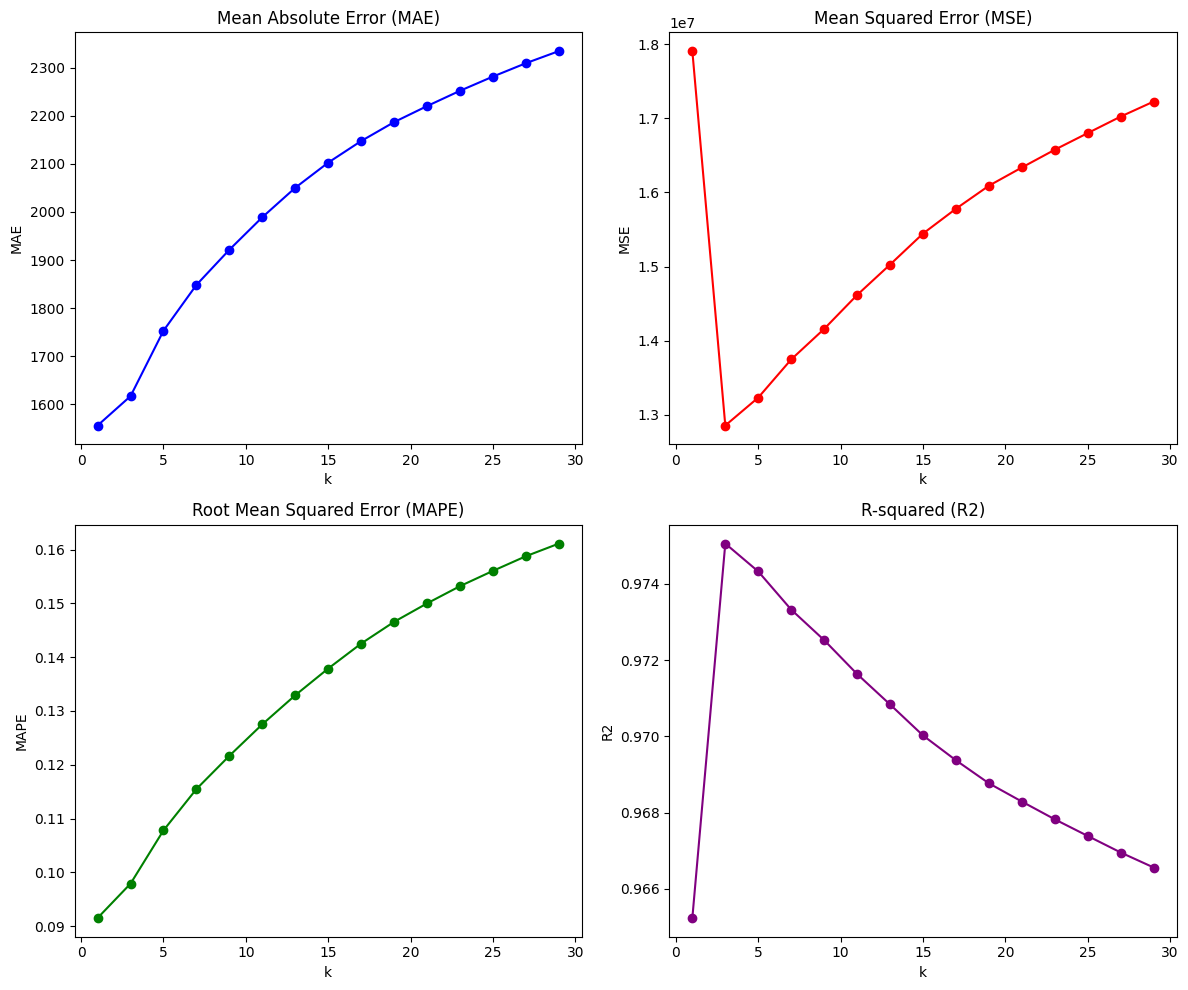

In [7]:
plot_KNN(results_df_stscaler)

## Linear regression

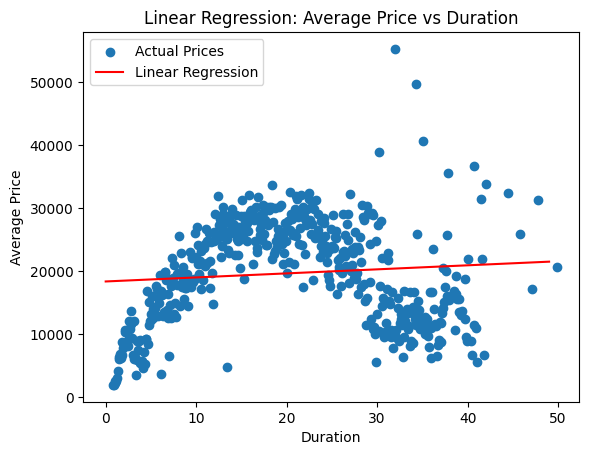

In [8]:
df = dataset.copy()
duration_avg_price = df.groupby('duration')['price'].mean().reset_index()

# Separate features (X) and target variable (y)
X_duration = duration_avg_price[['duration']]
y_duration = duration_avg_price['price']

# Create a linear regression model
model_duration = LinearRegression()

# Train the model
model_duration.fit(X_duration, y_duration)

# Make predictions for the entire range of durations
duration_range = pd.DataFrame({'duration': range(int(df['duration'].min()), int(df['duration'].max())+1)})
predicted_prices_duration = model_duration.predict(duration_range)

# Plot the results
plt.scatter(duration_avg_price['duration'], duration_avg_price['price'], label='Actual Prices')
plt.plot(duration_range['duration'], predicted_prices_duration, color='red', label='Linear Regression')
plt.xlabel("Duration")
plt.ylabel("Average Price")
plt.title("Linear Regression: Average Price vs Duration")
plt.legend()
plt.show()

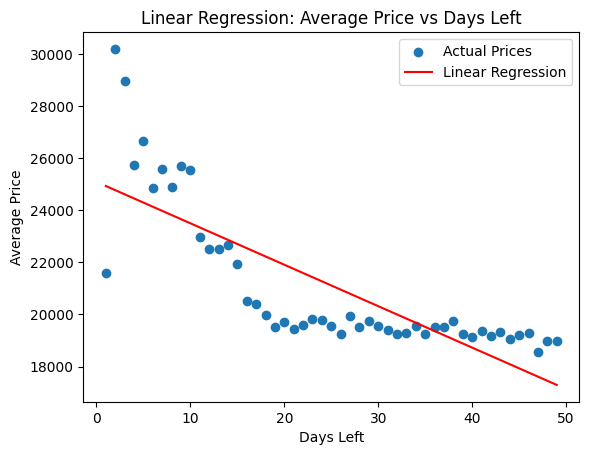

In [9]:
days_left_avg_price = df.groupby('days_left')['price'].mean().reset_index()

# Separate features (X) and target variable (y)
X_days_left = days_left_avg_price[['days_left']]
y_days_left = days_left_avg_price['price']

# Create a linear regression model
model_days_left = LinearRegression()

# Train the model
model_days_left.fit(X_days_left, y_days_left)

# Make predictions for the entire range of days_left
days_left_range = pd.DataFrame({'days_left': range(int(df['days_left'].min()), int(df['days_left'].max())+1)})
predicted_prices_days_left = model_days_left.predict(days_left_range)

# Plot the results
plt.scatter(days_left_avg_price['days_left'], days_left_avg_price['price'], label='Actual Prices')
plt.plot(days_left_range['days_left'], predicted_prices_days_left, color='red', label='Linear Regression')
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.title("Linear Regression: Average Price vs Days Left")
plt.legend()
plt.show()

## Ridge & Lasso

In [12]:
df = pd.read_csv("./Clean_Dataset.csv")
df.drop(columns='Unnamed: 0', inplace=True)
df.drop(columns='flight', inplace=True)
column=['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
df[column] = df[column].apply(LabelEncoder().fit_transform)

x = df.drop(['price'],axis=1)
y = df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

r_squared_Ridge_list = []
r_squared_Lasso_list = []
alpha_val = np.linspace(0,1,11)
Ridge_model = Ridge(alpha=1)
Lasso_model = Lasso(alpha=1)
r_squared_Ridge = mean(cross_val_score(Ridge_model, x, y, cv=15))
r_squared_Lasso = mean(cross_val_score(Lasso_model, x, y, cv=15))

mse_Ridge= -mean(cross_val_score(Ridge_model, x, y, cv=15, scoring="neg_mean_squared_error"))
mse_Lasso= -mean(cross_val_score(Lasso_model, x, y, cv=15, scoring="neg_mean_squared_error" ))

mae_Ridge = -mean(cross_val_score(Ridge_model, x, y, cv=15, scoring="neg_median_absolute_error"))
mae_Lasso = -mean(cross_val_score(Lasso_model, x, y, cv=15, scoring="neg_median_absolute_error" ))

mape_Ridge = -mean(cross_val_score(Ridge_model, x, y, cv=15, scoring="neg_median_absolute_error"))
mape_Lasso = -mean(cross_val_score(Lasso_model, x, y, cv=15, scoring="neg_median_absolute_error" ))

In [13]:
Ridge_model.fit(x_train, y_train)
y_pred = Ridge_model.predict(x_test)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred)
Lasso_model.fit(x_train, y_train)
y_pred = Lasso_model.predict(x_test)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred)
print("R2:", r_squared_Ridge, r_squared_Lasso)
print("MSE:", mse_Ridge, mse_Lasso)
print("MAE:", mae_Ridge, mae_Lasso)
print('MAPE:', mape_ridge, mape_lasso)

R2: 0.0914556677858658 0.09178072257518251
MSE: 51448406.860034846 51448307.69563575
MAE: 3779.2992629731034 3779.0856393821105
MAPE: 0.43753425525029327 0.4374097423517117


## Decission Tree

In [14]:
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MSE with default parameters: {round(mse/1e6, 3)} mln')
print(f'MAE with default parameters: {round(mae/1e3, 3)} k')
print(f'r2 with default parameters: {r2}')
print(f'MAPE with default parameters: {mape}')

MSE with default parameters: 12.744 mln
MAE with default parameters: 1.18 k
r2 with default parameters: 0.97527661029418
MAPE with default parameters: 0.07440320719308587


In [15]:
param_grid = {'max_depth': [None,5, 7, 10, 13, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 12, 15, 17, 20, 25, 30]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': None, 'min_samples_split': 30}

In [16]:
model2 = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_split = best_params['min_samples_split'])
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MSE with default parameters (Decission Tree): {round(mse/1e6, 3)} mln')
print(f'MAE with default parameters (Decission Tree): {round(mae/1e3, 3)} k')
print(f'r2 with default parameters (Decission Tree): {round(r2, 2)}')
print(f'MAPE with default parameters: {mape}')

MSE with default parameters (Decission Tree): 8.627 mln
MAE with default parameters (Decission Tree): 1.253 k
r2 with default parameters (Decission Tree): 0.98
MAPE with default parameters: 0.08843264960532171


## XGBoost

In [17]:
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'n_estimators': [100, 250, 500]
}

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MSE with default parameters (XGBoost): {round(mse/1e6, 3)} mln')
print(f'MAE with default parameters (XGBoost): {round(mae/1e3, 3)} k')
print(f'r2 with default parameters (XGBoost): {round(r2, 2)}')
print(f'MAPE with default parameters: {mape}')

MSE with default parameters (XGBoost): 8.739 mln
MAE with default parameters (XGBoost): 1.622 k
r2 with default parameters (XGBoost): 0.98
MAPE with default parameters: 0.12096468706084898
